## Introduction

This dataset gives us information of daily US border crossings from 1996 to 2020.

Questions:
- Does passenger border crossings growing in popularity? How about cargo?
- Is there a disparity in the popularity of border crossings? Have the top border crossings grown even more over the years?
- Which locations are more popular for passengers? Is it similar to the popular ports for cargo?
- Are there any differences in pattern between the US-Canada border and the US-Mexico border?

Dataset taken from Kaggle
https://www.kaggle.com/divyansh22/us-border-crossing-data

In [282]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [283]:
data = pd.read_csv('Border_Crossing_Entry_Data.csv')

In [284]:
data.shape

(355511, 7)

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  355511 non-null  object
 1   State      355511 non-null  object
 2   Port Code  355511 non-null  int64 
 3   Border     355511 non-null  object
 4   Date       355511 non-null  object
 5   Measure    355511 non-null  object
 6   Value      355511 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 19.0+ MB


In [286]:
data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


Check if there is any missing values

In [287]:
data.isna().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

Let's explore the columns, what are the different types of categories that people can enter the US?

In [288]:
list(data['Measure'].unique())

['Personal Vehicle Passengers',
 'Personal Vehicles',
 'Truck Containers Empty',
 'Truck Containers Full',
 'Trucks',
 'Bus Passengers',
 'Buses',
 'Pedestrians',
 'Rail Containers Empty',
 'Rail Containers Full',
 'Train Passengers',
 'Trains']

## Data Exploration

#### Q: Which states have the most ports?

In [289]:
data[['Port Code','State']].drop_duplicates().groupby('State')['Port Code'].count()

State
AK     4
AZ     6
CA     7
ID     2
ME    13
MI     4
MN     8
MT    13
ND    18
NM     2
NY     7
OH     1
TX    12
VT     5
WA    15
Name: Port Code, dtype: int64

A: North Dakota surprisingly has the most border crossing points. I had originally expected it to be Texas or Montana since it has the longest border line with Mexico and Canada

#### Q: We expect that the number of Port Names and the number of Port Codes will be the same, let's double check that here

In [290]:
print("There are {} unique Port Names".format(len(data['Port Name'].unique())))
print("There are {} unique Port Codes".format(len(data['Port Code'].unique())))

There are 116 unique Port Names
There are 117 unique Port Codes


The number of Port Names does not match with the number of Port Codes, perhaps there is a port that has two codes assigned to it

In [291]:
unique_ports = data[['Port Name','State','Port Code']].drop_duplicates()
unique_ports[unique_ports['Port Name'].duplicated(keep = False)]

,Port Name,State,Port Code
203,Eastport,ID,3302
215,Eastport,ME,103


The extra port code is because there are two ports named Eastport, in two different states.

#### Q: What percentage of border crossing ports support each type of border crossing type?  

In [292]:
unique_crossings = data[['Port Code','Measure']].drop_duplicates()
round(unique_crossings.groupby('Measure').count() / 117,3)

,Port Code
Measure,
Bus Passengers,0.974
Buses,0.974
Pedestrians,0.983
Personal Vehicle Passengers,0.983
Personal Vehicles,0.991
Rail Containers Empty,0.974
Rail Containers Full,0.974
Train Passengers,0.974
Trains,0.974


A: Almost all ports support all methods of crossing

#### Q: How popular is each type of crossing method?

In [293]:
crossing_count = data[['Measure','Value']].groupby('Measure').sum()
crossing_count['Value'] = round(crossing_count['Value'] / crossing_count['Value'].sum(),4)

Text(0, 0.5, 'Crossing Type')

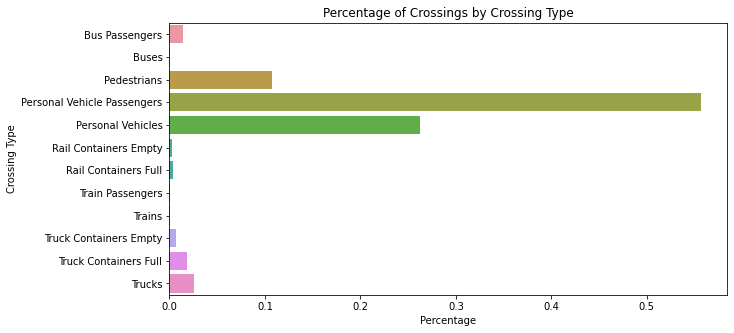

In [294]:
ax = sns.barplot(x='Value',y=crossing_count.index, data=crossing_count, orient='h')
ax.set_title('Percentage of Crossings by Crossing Type')
ax.set_xlabel('Percentage')
ax.set_ylabel('Crossing Type')

The overwhelming majority (90%+) of border crossings are done by regular people. Additionally, about 80% of border crossings are done by car

## Answering our Main Questions

#### Q1: Has passenger border crossings growing in popularity over time? How about cargo?

We will now convert the Date column to date time format and extract the month day and year

In [295]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].map(lambda x: x.year)
data['Month'] = data['Date'].map(lambda x: x.month)
data['Day'] = data['Date'].map(lambda x: x.day)

We will now also want to create a new category that can simplify Crossing Type into either Passenger, Vehicle or Cargo

In [296]:
cat_dict = {'Bus Passengers':'Passenger','Pedestrians':'Passenger','Personal Vehicle Passengers':'Passenger','Train Passengers':'Passenger','Truck Containers Empty':'Cargo','Truck Containers Full':'Cargo','Rail Containers Empty':'Cargo','Rail Containers Full':'Cargo','Buses':'Vehicles','Personal Vehicles':'Vehicles','Trains':'Vehicles','Trucks':'Vehicles'}
#passenger_cats = ['Bus Passengers','Pedestrians','Personal Vehicle Passengers','Train Passengers']
#cargo_cats = ['Truck Containers Empty','Truck Containers Full','Rail Containers Empty', 'Rail Containers Full']
#vehicles_cats = ['Buses','Pesonal Vehicles','Trains','Trucks']
data['Crossing Type'] = data['Measure'].map(cat_dict)

In [297]:
crossings = data[['Crossing Type','Year','Value']].groupby(['Crossing Type','Year']).sum().reset_index()

Text(0, 0.5, 'Crossings')

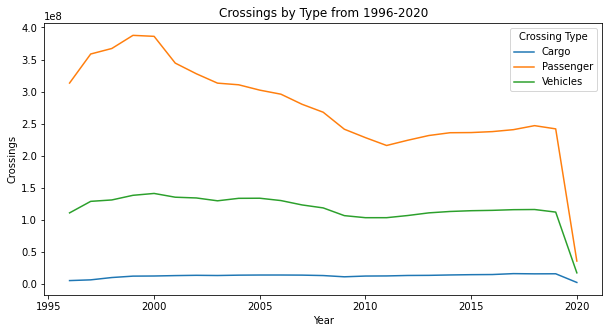

In [298]:
plt.rcParams['figure.figsize'] = [10, 5]
ax = sns.lineplot(data=crossings,x='Year',y='Value',hue='Crossing Type')
ax.set_title('Crossings by Type from 1996-2020')
ax.set_ylabel('Crossings')

A: The amount of people that crossed into the US peaked around 2000. This is surprising to me, as I thought the amount of people that would cross into the US would increase on a year by year basis. Additionally, we also see that the amount of vehicles stays relatively the same even though the amount of passengers decreases. Why is this?

In [316]:
bus_crossings = data[data['Measure'] == 'Buses']
bus_crossings = bus_crossings[['Year','Value']].groupby('Year').sum().reset_index()

Text(0, 0.5, 'Crossings')

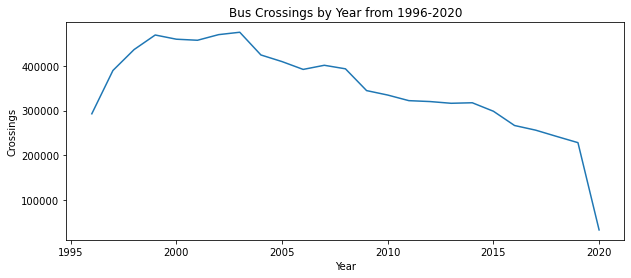

In [326]:
plt.rcParams['figure.figsize'] = [10, 4]
ax = sns.lineplot(data=bus_crossings,x='Year',y='Value')
ax.set_title('Bus Crossings by Year from 1996-2020')
ax.set_ylabel('Crossings')

In [323]:
car_crossings = data[data['Measure'] == 'Personal Vehicles']
car_crossings = car_crossings[['Year','Value']].groupby('Year').sum().reset_index()

Text(0, 0.5, 'Crossings')

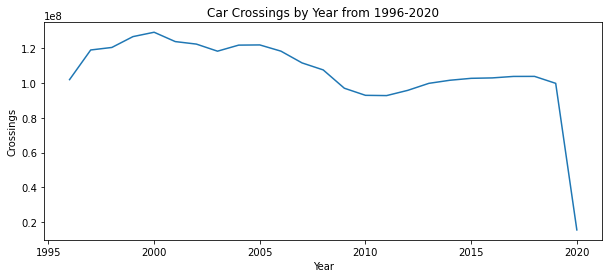

In [327]:
ax = sns.lineplot(data=car_crossings,x='Year',y='Value')
ax.set_title('Car Crossings by Year from 1996-2020')
ax.set_ylabel('Crossings')

In [357]:
car_crossings = data[data['Measure'].isin(['Personal Vehicles','Personal Vehicle Passengers'])]
car_crossings = car_crossings[['Measure','Year','Value']].groupby(['Year','Measure']).sum().reset_index()
pvp = car_crossings[car_crossings['Measure'] == 'Personal Vehicle Passengers'].set_index('Year')
pv = car_crossings[car_crossings['Measure'] == 'Personal Vehicles'].set_index('Year')
ratio = pvp['Value']/pv['Value']

Text(0, 0.5, 'Passengers per Car')

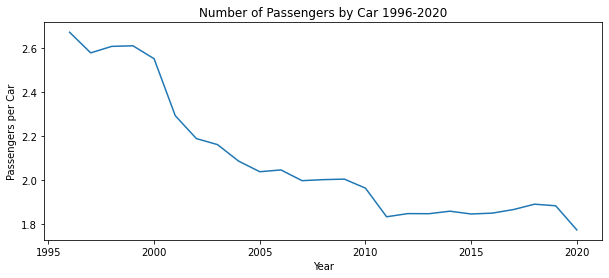

In [356]:
ax = sns.lineplot(data=ratio,x=ratio.index, y=ratio)
ax.set_title('Number of Passengers by Car 1996-2020')
ax.set_ylabel('Passengers per Car')

Followup answer: We see that the number of people that have crossed the border has decreased over time from its peak around year 2000. When looking at the number of bus and cars that have crossed the border, there is a slight decrease, but nothing too noticeable substancial to cause the effect described earlier. What seems to be the big difference is that the number of passengers per car has decreased by almost a whole person per car. Could this because there are more people commuting because of work purposes, rather than tourism?

#### Q2: Is there a disparity in the popularity of border crossings? Have the top border crossings grown even more over the years?

In [361]:
crossings_2 = data[['Port Name','State','Year','Value']].groupby(['Port Name','State','Year']).sum().reset_index()
crossings_total_2 = crossings_2[['Port Name','Value']].groupby(['Port Name']).sum().reset_index()
crossings_total_2 = crossings_total_2.sort_values('Value',ascending=False).reset_index()
crossings_total_2

,index,Port Name,Value
0,34,El Paso,1186748989
1,91,San Ysidro,1184198982
2,51,Laredo,676914805
3,44,Hidalgo,583725539
4,15,Buffalo-Niagara Falls,559736205
...,...,...,...
111,115,Willow Creek,150005
112,2,Algonac,121107
113,11,Boquillas,71870
114,113,Whitlash,68987


Text(0, 0.5, 'Port')

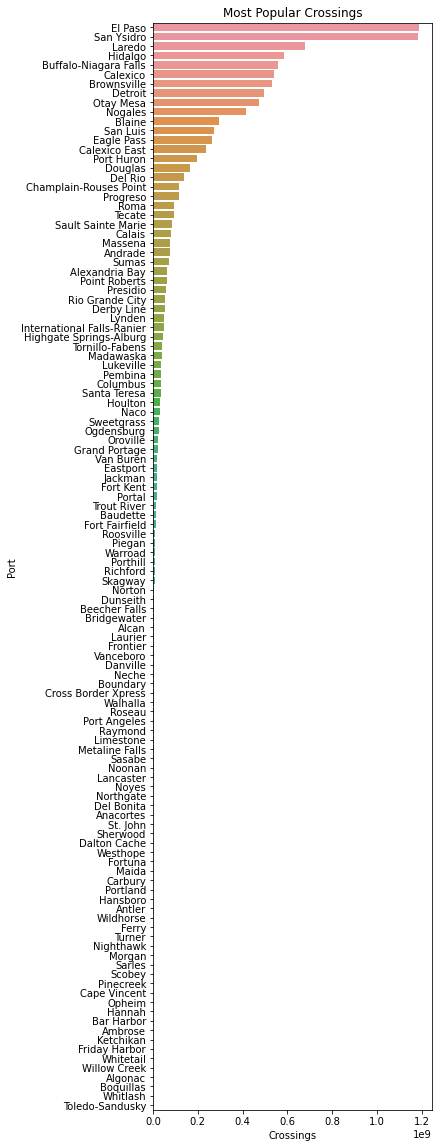

In [301]:
plt.rcParams['figure.figsize'] = [5, 20]
ax = sns.barplot(x='Value',y='Port Name', data=crossings_total_2, orient='h')
ax.set_title('Most Popular Crossings')
ax.set_xlabel('Crossings')
ax.set_ylabel('Port')

In [302]:
#reduce crossings 2 dataset by only having the top 10 most popular border crossings
top_ten_crossings = crossings_total_2.iloc[:10]['Port Name']
crossings_2 = crossings_2.loc[crossings_2['Port Name'].isin(top_ten_crossings)]

Text(0, 0.5, 'Crossings')

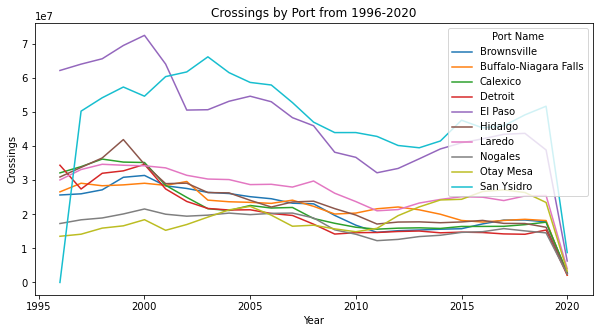

In [303]:
plt.rcParams['figure.figsize'] = [10, 5]
ax = sns.lineplot(data=crossings_2,x='Year',y='Value',hue='Port Name')
ax.set_title('Crossings by Port from 1996-2020')
ax.set_ylabel('Crossings')

A: Although there are 117 areas to cross into Canada or Mexico, not all of them are commonly used. However, the disparity in usage makes sense. The top border crossings serves large metropolitan areas at both the US and non-US sides.
- El Paso (El Paso & Ciudad Juarez)
- San Ysidro (San Diego & Tijuana)
- Laredo (Laredo & Nuevo Laredo)
- Hidalgo (McAllen & Reynosa)
- Buffalo (Buffalo & Niagara Falls)

On the other end, the least popular border crossings are in more remote areas in less populated areas
- Toledo (this seems to be an entry point only for boats)
- Whitlash (middle of an uninhabited area of Montana)
- Boquillas (middle of an area far from any highways in Texas)
- Algonac (seems to be only for boats as well)
- Willow Creek (middle of an uninhabited area of Montana)

In [375]:
most_pop = crossings_total_2.iloc[:5]['Port Name']
least_pop = crossings_total_2.iloc[-5:]['Port Name']
most_crossings = data[['Crossing Type','Measure','Port Name','Value']].loc[data['Port Name'].isin(most_pop)]
least_crossings = data[['Crossing Type','Measure','Port Name','Value']].loc[data['Port Name'].isin(least_pop)]
most_crossings_pie = most_crossings[['Crossing Type','Value']].groupby('Crossing Type').sum().reset_index()
least_crossings_pie = least_crossings[['Crossing Type','Value']].groupby('Crossing Type').sum().reset_index()

Text(0.5, 1.0, 'Border Crossing Type of Bottom 5 Ports')

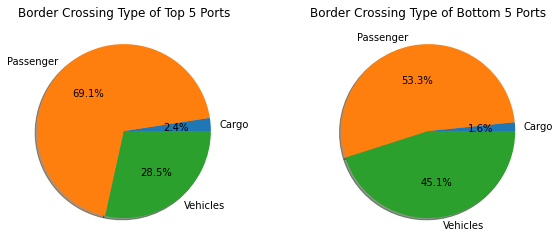

In [374]:
plt.subplot(1,2,1)
plt.pie(most_crossings_pie['Value'],labels=most_crossings_pie['Crossing Type'],autopct='%1.1f%%',shadow=True)
plt.title('Border Crossing Type of Top 5 Ports')

plt.subplot(1,2,2)
plt.pie(least_crossings_pie['Value'],labels=least_crossings_pie['Crossing Type'],autopct='%1.1f%%',shadow=True)
plt.title('Border Crossing Type of Bottom 5 Ports')

In [381]:
most_crossings_pie = most_crossings[most_crossings['Crossing Type'] == 'Vehicles'].groupby('Measure').sum().reset_index()
least_crossings_pie = least_crossings[least_crossings['Crossing Type'] == 'Vehicles'].groupby('Measure').sum().reset_index()
most_crossings_pie2 = most_crossings[most_crossings['Crossing Type'] == 'Passenger'].groupby('Measure').sum().reset_index()
least_crossings_pie2 = least_crossings[least_crossings['Crossing Type'] == 'Passenger'].groupby('Measure').sum().reset_index()

Text(0.5, 1.0, 'Passenger Type of Bottom 5 Ports')

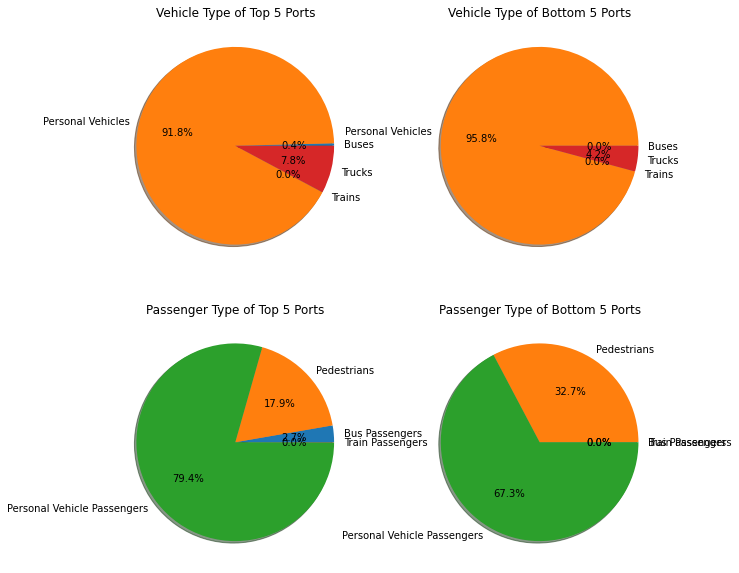

In [385]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(2,2,1)
plt.pie(most_crossings_pie['Value'],labels=most_crossings_pie['Measure'],autopct='%1.1f%%',shadow=True)
plt.title('Vehicle Type of Top 5 Ports')

plt.subplot(2,2,2)
plt.pie(least_crossings_pie['Value'],labels=least_crossings_pie['Measure'],autopct='%1.1f%%',shadow=True)
plt.title('Vehicle Type of Bottom 5 Ports')

plt.subplot(2,2,3)
plt.pie(most_crossings_pie2['Value'],labels=most_crossings_pie2['Measure'],autopct='%1.1f%%',shadow=True)
plt.title('Passenger Type of Top 5 Ports')

plt.subplot(2,2,4)
plt.pie(least_crossings_pie2['Value'],labels=least_crossings_pie2['Measure'],autopct='%1.1f%%',shadow=True)
plt.title('Passenger Type of Bottom 5 Ports')

Followup Answer - Passenger:Vehicle ratio is higher for the popular ports. Of the vehicles, the trucks:personal vehicle ratio is higher among the more popular ports, versus the bottom ports. This makes sense as the popular ports will lie among the more efficient routes. Therefore, trucks that are looking to transport good somewhere inland will likely enter into a freeway at the popular ports. Pedestrians are also more likely to frequent the less popular ports than people in cars.

#### Q3: Which locations are more popular for passengers? Is it similar to the popular ports for cargo?

In [304]:
crossings_3 = data[['Port Name','Crossing Type','Year','Value']].groupby(['Port Name','Crossing Type']).sum().reset_index()
passenger_crossings = crossings_3[crossings_3['Crossing Type'] == 'Passenger']
cargo_crossings = crossings_3[crossings_3['Crossing Type'] == 'Cargo']
passenger_crossings = passenger_crossings.sort_values('Value',ascending=False)[:10]
cargo_crossings = cargo_crossings.sort_values('Value',ascending=False)[:10]

Text(0, 0.5, 'Port')

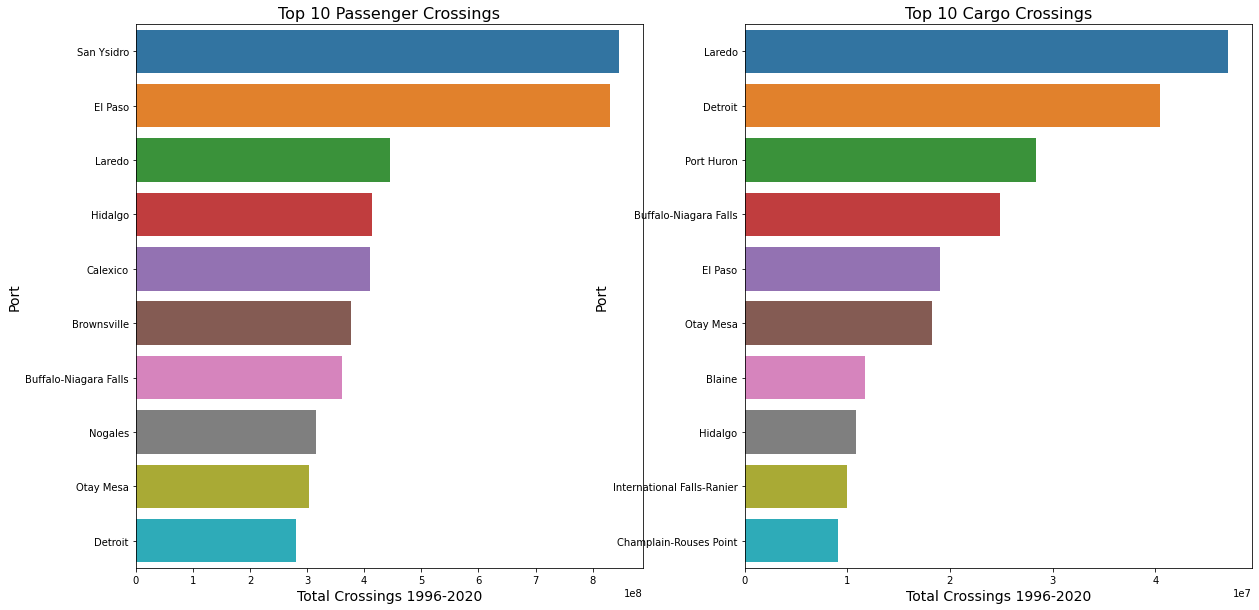

In [305]:
plt.rcParams['figure.figsize'] = [20,10]
plt.subplot(1,2,1)
ax = sns.barplot(x='Value',y='Port Name', data=passenger_crossings, orient='h')
ax.set_title('Top 10 Passenger Crossings',fontsize=16)
ax.set_xlabel('Total Crossings 1996-2020',fontsize=14)
ax.set_ylabel('Port',fontsize=14)

plt.subplot(1,2,2)
ax = sns.barplot(x='Value',y='Port Name', data=cargo_crossings, orient='h')
ax.set_title('Top 10 Cargo Crossings',fontsize=16)
ax.set_xlabel('Total Crossings 1996-2020',fontsize=14)
ax.set_ylabel('Port',fontsize=14)

#### Q4: Are there any differences in pattern between the US-Canada border and the US-Mexico border?

In [306]:
canada = data[data['Border'] == 'US-Canada Border']
mexico = data[data['Border'] == 'US-Mexico Border']

In [307]:
canada_pie = canada[['Crossing Type','Value']].groupby('Crossing Type').sum().reset_index()
mexico_pie = mexico[['Crossing Type','Value']].groupby('Crossing Type').sum().reset_index()

Text(0.5, 1.0, 'Mexico Border Crossings')

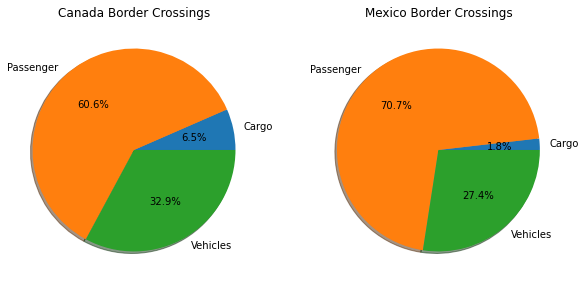

In [308]:
plt.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.pie(canada_pie['Value'],labels=canada_pie['Crossing Type'],autopct='%1.1f%%',shadow=True)
plt.title('Canada Border Crossings')

plt.subplot(1,2,2)
plt.pie(mexico_pie['Value'],labels=mexico_pie['Crossing Type'],autopct='%1.1f%%',shadow=True)
plt.title('Mexico Border Crossings')

In [309]:
canada_pie = canada[canada['Crossing Type'] == 'Passenger']
canada_pie = canada_pie[['Measure','Value']].groupby('Measure').sum().reset_index()
mexico_pie = mexico[mexico['Crossing Type'] == 'Passenger']
mexico_pie = mexico_pie[['Measure','Value']].groupby('Measure').sum().reset_index()

Text(0.5, 1.0, 'Mexico Citizen Border Crossings')

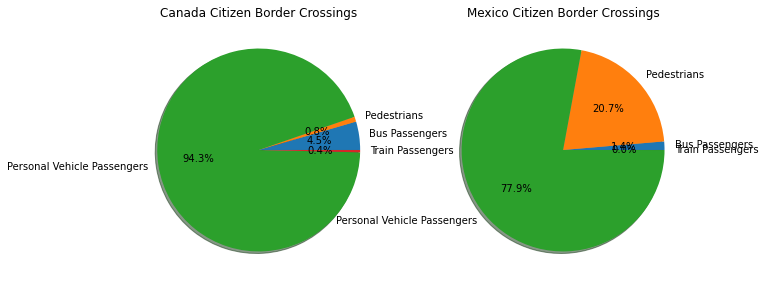

In [310]:
plt.subplot(1,2,1)
plt.pie(canada_pie['Value'],labels=canada_pie['Measure'],autopct='%1.1f%%',shadow=True)
plt.title('Canada Citizen Border Crossings')

plt.subplot(1,2,2)
plt.pie(mexico_pie['Value'],labels=mexico_pie['Measure'],autopct='%1.1f%%',shadow=True)
plt.title('Mexico Citizen Border Crossings')

In [311]:
canada_pie = canada[canada['Crossing Type'] == 'Cargo']
canada_pie = canada_pie[['Measure','Value']].groupby('Measure').sum().reset_index()
mexico_pie = mexico[mexico['Crossing Type'] == 'Cargo']
mexico_pie = mexico_pie[['Measure','Value']].groupby('Measure').sum().reset_index()

Text(0.5, 1.0, 'Mexico Cargo Border Crossings')

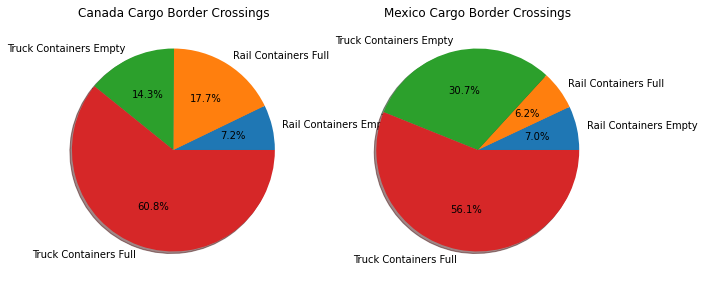

In [312]:
plt.subplot(1,2,1)
plt.pie(canada_pie['Value'],labels=canada_pie['Measure'],autopct='%1.1f%%',shadow=True)
plt.title('Canada Cargo Border Crossings')

plt.subplot(1,2,2)
plt.pie(mexico_pie['Value'],labels=mexico_pie['Measure'],autopct='%1.1f%%',shadow=True)
plt.title('Mexico Cargo Border Crossings')

Answer: For cargo vehicles crossing the borders, there are more Empty containers coming back from Mexico rather than Canada. This implies that we export more goods to Mexico than to Canada